In [2]:
%pip install numpy pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

In [10]:
df = pd.read_csv("iris.csv", names=col_names)

In [12]:
# Summarize the dataset
print(df.shape)

(150, 5)


In [16]:
# Print the first 5 rows to check data is as expected
print(df.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
# Print dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [22]:
# Print statistical analytics over dataset
print(df.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [25]:
# Unique rows of each class
print(df['Class'].value_counts())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


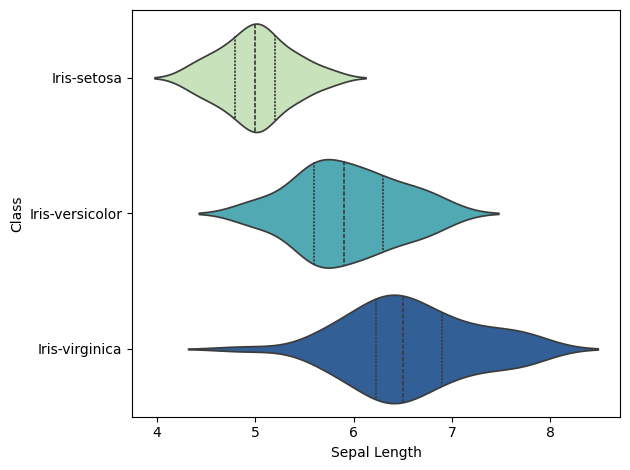

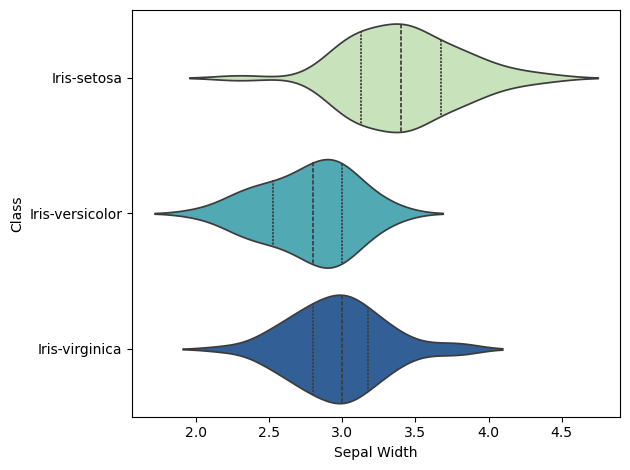

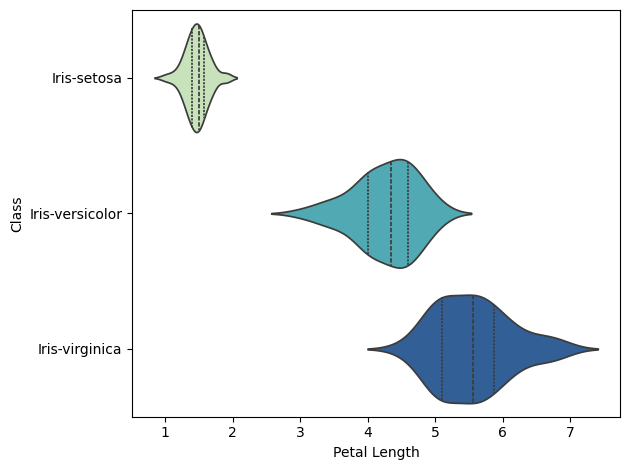

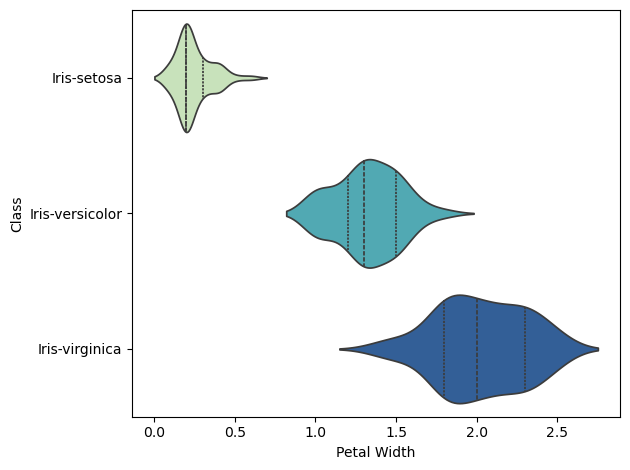

In [73]:
# Create violin plots to compare variable distribution
sns.violinplot(y='Class', x='Sepal Length', data=df, inner='quartile', hue='Class', palette='YlGnBu')
# Adjust the plot to ensure all labels are visible
plt.tight_layout()
plt.show()

sns.violinplot(y='Class', x='Sepal Width', data=df, inner='quartile', hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()

sns.violinplot(y='Class',x='Petal Length',data=df,inner='quartile',hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()

sns.violinplot(y='Class',x='Petal Width',data=df,inner='quartile',hue='Class', palette="YlGnBu")
plt.tight_layout()
plt.show()

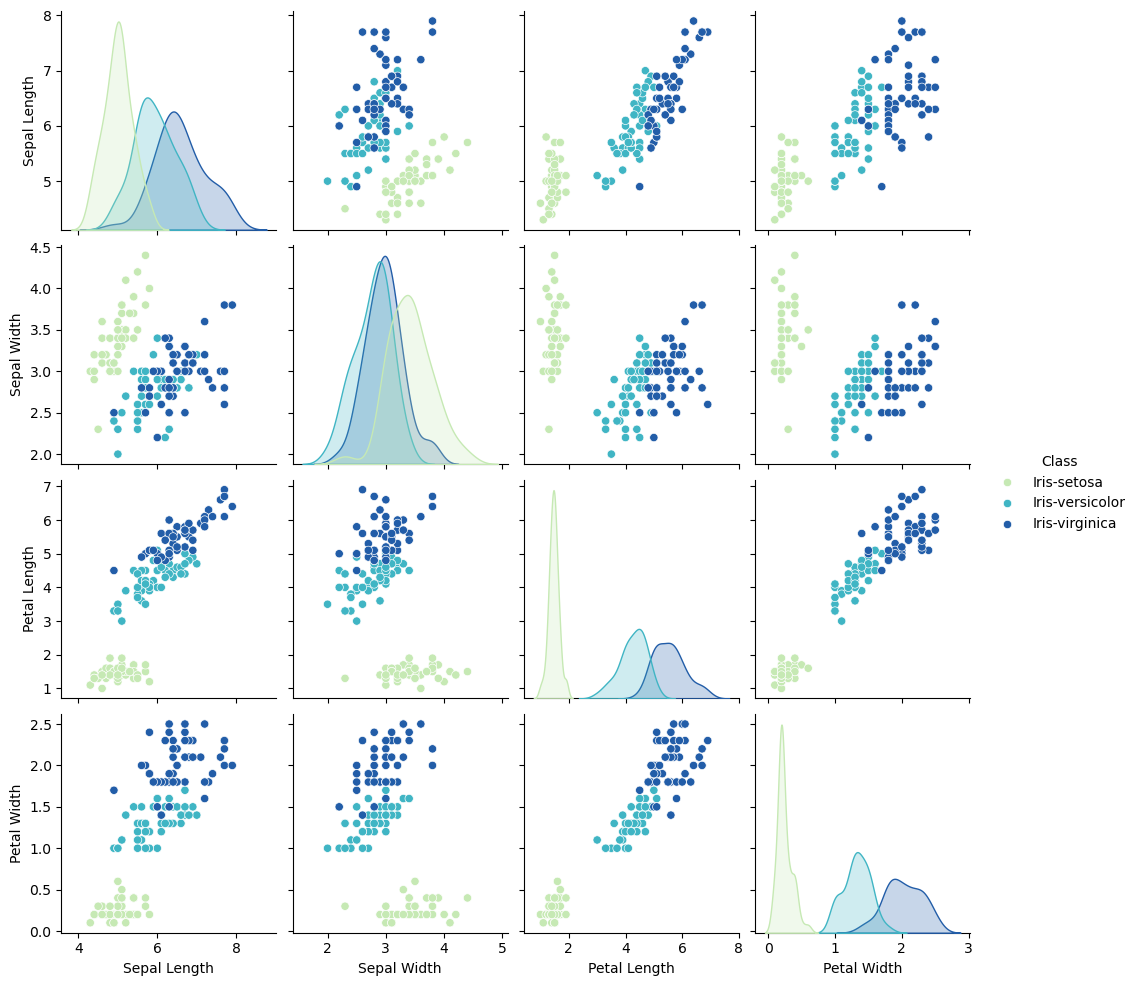

In [72]:
# Create pairs plot to check multiple pairwise bivariate distributions
sns.pairplot(df, hue='Class', palette='YlGnBu')
plt.show()

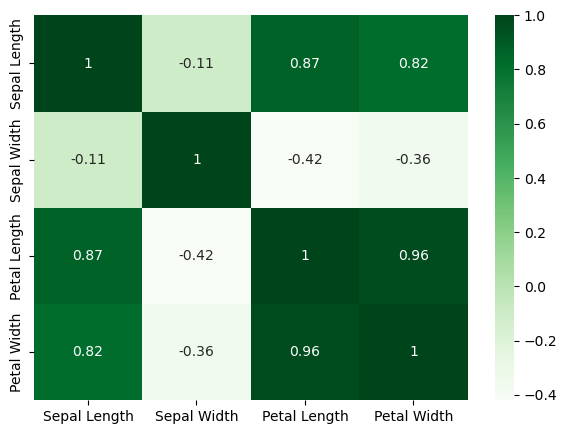

In [71]:
# Plot heatmap to check pairwise correlation
plt.figure(figsize=(7,5))

# Select only numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='Greens')
plt.show()

In [70]:
# Data separation (prediction data and classification)
x = df.drop(['Class'], axis='columns')
y = df['Class']

print(f'x shape: {x.shape} | y shape: {y.shape}')

x shape: (150, 4) | y shape: (150,)


In [68]:
# Split the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=1)

In [45]:
# Test six different algorithms in loop and print accuracy
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

# Evaluate aach Model
results = []
model_names = []

for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
DT: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)
RF: 0.941667 (0.053359)


In [65]:
# Train the SVC Model, make predictions on the test dataset and evaluate accuracy
svcmodel = SVC(gamma='auto')
svcmodel.fit(x_train, y_train)
predictions = svcmodel.predict(x_test)
# Evaluate Predictions
print(accuracy_score(y_test, predictions))

0.9666666666666667


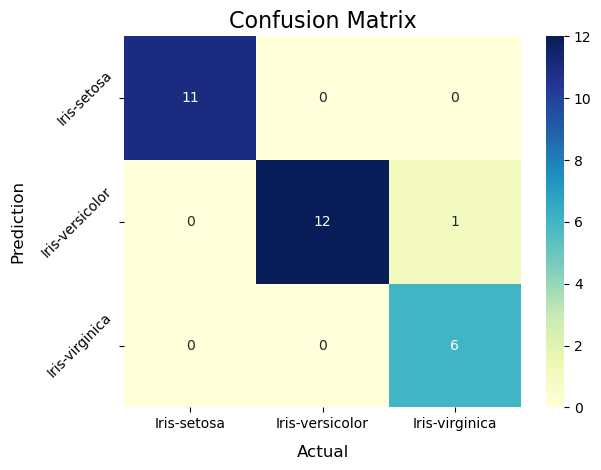

In [67]:
# Plot the confusion matrix in a heatmap
cm = confusion_matrix(y_test, predictions)

# Get nique ‘Class’ labels
class_labels = df['Class'].unique()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels, yticklabels=class_labels)

plt.yticks(rotation=45, ha='right')
plt.ylabel('Prediction',fontsize=12,labelpad=10)
plt.xlabel('Actual',fontsize=12,labelpad=10)
plt.title('Confusion Matrix',fontsize=16)
plt.tight_layout()
plt.show()

In [64]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

